# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
from ddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import random
import torch
import numpy as np

In [8]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=10)

In [9]:
def ddpg(n_episodes=1000, max_t=300, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    mean_scores = []                 # list containing running mean scores from 100 episodes
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            action1 = agent.act(state[0])
            action2 = agent.act(state[1])
            action = np.concatenate((action1, action2), axis=0)
            action = np.clip(action, -1, 1)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            agent.step(state, action, reward, next_state, done)

            state = next_state
            score += reward
            if np.any(done):
                break
        scores_deque.append(np.max(score))
        scores.append(np.max(score))
        mean_scores.append(np.mean(scores_deque))  # save running mean
        print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_deque)))

        if np.mean(scores_deque) > 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(i_episode,
                                                                                         np.mean(scores_deque)))
            break

    return scores, mean_scores

In [10]:
scores, mean_scores = ddpg(n_episodes=5000, max_t=1000)

C:\ProgramData\Anaconda2\envs\udacity\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 4	Average Score: 0.0000

D:\GitClone\Machine_Learning\Udacity\Deep Re-inforcement Learning\deep-reinforcement-learning\p3_collab-compet\ddpg_agent.py:84: UserWarning: Using a target size (torch.Size([128, 2])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  critic_loss = F.mse_loss(Q_expected, Q_targets)


Episode 100	Average Score: 0.0000
Episode 200	Average Score: 0.0000
Episode 300	Average Score: 0.0000
Episode 400	Average Score: 0.0010
Episode 500	Average Score: 0.0260
Episode 600	Average Score: 0.0194
Episode 700	Average Score: 0.0811
Episode 800	Average Score: 0.0882
Episode 900	Average Score: 0.0624
Episode 1000	Average Score: 0.0099
Episode 1100	Average Score: 0.0890
Episode 1200	Average Score: 0.0524
Episode 1300	Average Score: 0.0340
Episode 1400	Average Score: 0.0973
Episode 1475	Average Score: 0.5219
Environment solved in 1475 episodes!	Average Score: 0.5219


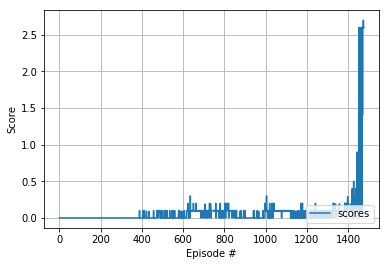

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label='scores')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [12]:
from torchsummary import summary
summary(agent.actor_local, (state_size,))

C:\ProgramData\Anaconda2\envs\udacity\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           3,200
       BatchNorm1d-2                  [-1, 128]             256
            Linear-3                  [-1, 128]          16,512
            Linear-4                    [-1, 2]             258
Total params: 20,226
Trainable params: 20,226
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.08
Estimated Total Size (MB): 0.08
----------------------------------------------------------------


In [13]:
summary(agent.critic_local, [(state_size,), (action_size, )])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           3,200
       BatchNorm1d-2                  [-1, 128]             256
            Linear-3                  [-1, 128]          16,768
            Linear-4                    [-1, 1]             129
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.08
Estimated Total Size (MB): 0.08
----------------------------------------------------------------


In [22]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=50)

In [23]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [24]:
n_episodes=100
scores_deque = deque(maxlen=100)
scores = []
mean_scores = []
max_t = 1000
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations
    agent.reset()
    score = np.zeros(num_agents)
    for t in range(max_t):
        action1 = agent.act(state[0])
        action2 = agent.act(state[1])
        action = np.concatenate((action1, action2), axis=0)
        action = np.clip(action, -1, 1)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations
        reward = env_info.rewards
        done = env_info.local_done
        #agent.step(state, action, reward, next_state, done)

        state = next_state
        score += reward
        if np.any(done):
            break
    scores_deque.append(np.max(score))
    scores.append(np.max(score))
    mean_scores.append(np.mean(scores_deque))  # save running mean     
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
    
print("Average Score Of 100 Consecutive Episodes: {}".format(np.mean(mean_scores)))

C:\ProgramData\Anaconda2\envs\udacity\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Average Score: 2.60
Episode 2	Average Score: 2.60
Episode 3	Average Score: 2.63
Episode 4	Average Score: 2.20
Episode 5	Average Score: 1.78
Episode 6	Average Score: 1.92
Episode 7	Average Score: 2.01
Episode 8	Average Score: 2.10
Episode 9	Average Score: 2.08
Episode 10	Average Score: 2.13
Episode 11	Average Score: 2.17
Episode 12	Average Score: 2.05
Episode 13	Average Score: 2.09
Episode 14	Average Score: 2.13
Episode 15	Average Score: 2.17
Episode 16	Average Score: 2.19
Episode 17	Average Score: 2.20
Episode 18	Average Score: 2.22
Episode 19	Average Score: 2.15
Episode 20	Average Score: 2.18
Episode 21	Average Score: 2.07
Episode 22	Average Score: 2.10
Episode 23	Average Score: 2.04
Episode 24	Average Score: 2.06
Episode 25	Average Score: 2.00
Episode 26	Average Score: 2.02
Episode 27	Average Score: 2.01
Episode 28	Average Score: 2.03
Episode 29	Average Score: 2.05
Episode 30	Average Score: 2.07
Episode 31	Average Score: 2.09
Episode 32	Average Score: 2.04
Episode 33	Averag

In [25]:
env.close()